## Load dataset

In [ ]:
import pathlib # manipulate paths
import glob 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Mounted at /content/gdrive


In [ ]:
def acc_loss_graph(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.legend()
  plt.title('Training and validation accuracy')

  plt.figure()
  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joeycomeau2301","key":"fb7763bf8c4f5580c40467e4dc839192"}'}

In [ ]:
# Install kaggle package
!pip install --upgrade --force-reinstall --no-deps kaggle

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permission

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=2e384b7ea7209623a94f2f15c16efa8fe9460ecd6968e54878bad7b271159fb6
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset -p /content/gdrive/MyDrive/EXAMPLE/FACE_MASK

 97% 320M/330M [00:03<00:00, 119MB/s]
100% 330M/330M [00:03<00:00, 101MB/s]


In [ ]:
!unzip -q /content/gdrive/MyDrive/EXAMPLE/FACE_MASK/face-mask-12k-images-dataset.zip -d .

## Organize Data

In [ ]:
import os

In [ ]:
base_dir = './Face Mask Dataset'

train_dir = os.path.join(base_dir, 'Train')
print(train_dir)

val_dir = os.path.join(base_dir, 'Validation')
print(val_dir)

./Face Mask Dataset/Train
./Face Mask Dataset/Validation


In [ ]:
# Get all folders paths in train path
train_paths = pathlib.Path('/content/Face Mask Dataset/Train')
train_paths_list = list(train_paths.glob('*/*'))
print(f'Number of paths in train path: ',len(train_paths_list))
print(f'First image path in train path: ', train_paths_list[0])

Number of paths in train path:  10000
First image path in train path:  /content/Face Mask Dataset/Train/WithMask/Augmented_19_6524182.png


In [ ]:
# List of label names
label_names = sorted(item.name for item in train_paths.glob('*/') if item.is_dir())
label_names

['WithMask', 'WithoutMask']

In [ ]:
# with_mask train data
train_mask = [str(item) for item in train_paths.glob('./WithMask/*')if item.is_file()]
print(train_mask[:10])
print(len(train_mask))

# without_mask train data
train_no_mask = [str(item) for item in train_paths.glob('./WithoutMask/*')if item.is_file()]
print(train_no_mask[:10])
print(len(train_no_mask))

['/content/Face Mask Dataset/Train/WithMask/Augmented_19_6524182.png', '/content/Face Mask Dataset/Train/WithMask/Augmented_366_9449569.png', '/content/Face Mask Dataset/Train/WithMask/Augmented_635_3981353.png', '/content/Face Mask Dataset/Train/WithMask/Augmented_574_7972756.png', '/content/Face Mask Dataset/Train/WithMask/Augmented_78_6482768.png', '/content/Face Mask Dataset/Train/WithMask/Augmented_669_8253409.png', '/content/Face Mask Dataset/Train/WithMask/Augmented_762_2502169.png', '/content/Face Mask Dataset/Train/WithMask/Augmented_267_9812003.png', '/content/Face Mask Dataset/Train/WithMask/Augmented_135_7362911.png', '/content/Face Mask Dataset/Train/WithMask/Augmented_186_5808531.png']
5000
['/content/Face Mask Dataset/Train/WithoutMask/292.png', '/content/Face Mask Dataset/Train/WithoutMask/4592.png', '/content/Face Mask Dataset/Train/WithoutMask/4978.png', '/content/Face Mask Dataset/Train/WithoutMask/5172.png', '/content/Face Mask Dataset/Train/WithoutMask/2288.png', '

In [ ]:
train_mask_fnames = os.listdir(list(train_paths.glob('*'))[0])
print(train_mask_fnames[:10])

train_no_mask_fnames = os.listdir(list(train_paths.glob('*'))[1])
print(train_no_mask_fnames[:10])

['Augmented_19_6524182.png', 'Augmented_366_9449569.png', 'Augmented_635_3981353.png', 'Augmented_574_7972756.png', 'Augmented_78_6482768.png', 'Augmented_669_8253409.png', 'Augmented_762_2502169.png', 'Augmented_267_9812003.png', 'Augmented_135_7362911.png', 'Augmented_186_5808531.png']
['292.png', '4592.png', '4978.png', '5172.png', '2288.png', '1236.png', '4887.png', '4676.png', '4078.png', '3304.png']


## Explore data

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

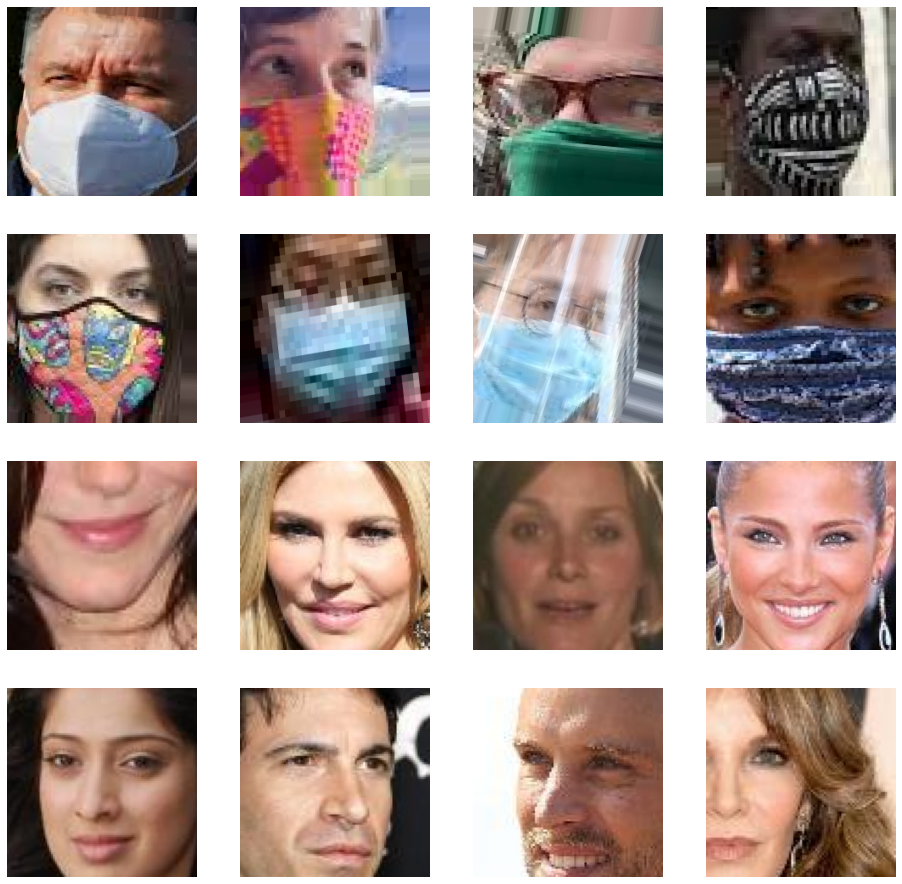

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.figure()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_mask_pix = [os.path.join(list(train_paths.glob('*'))[0], fname) 
                for fname in train_mask_fnames[pic_index-8:pic_index] 
               ]

next_no_mask_pix = [os.path.join(list(train_paths.glob('*'))[1], fname) 
                for fname in train_no_mask_fnames[pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_mask_pix+next_no_mask_pix):

  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## MAIN PROCESS

### First try with CNN model

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Function to build CNN model
def cnn_maker():
  model = tf.keras.models.Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
      MaxPooling2D(2,2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(2, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',     
                metrics = ['accuracy'])
  return model

In [ ]:
model_cnn = cnn_maker()
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

## Prepare ImageDataGenerator

In [ ]:
def generator_maker():
  # All images will be rescaled by 1./255.
  train_datagen = ImageDataGenerator(rescale=1./255)
  test_datagen  = ImageDataGenerator(rescale=1./255)

  # --------------------
  # Flow training images in batches of 32 using train_datagen generator
  # --------------------
  train_generator = train_datagen.flow_from_directory(train_dir, # This is the source directory for training images
                                                      batch_size=32,
                                                      class_mode='categorical',   
                                                      target_size=(224, 224))     
  # --------------------
  # Flow validation images in batches of 32 using test_datagen generator
  # --------------------
  validation_generator =  test_datagen.flow_from_directory(val_dir,
                                                          batch_size=32,
                                                          class_mode  = 'categorical',  
                                                          target_size = (224,224))
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = generator_maker()

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
history_cnn = model_cnn.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    verbose=1)

Epoch 1/20
313/313 [==============================] - 42s 79ms/step - loss: 0.1823 - accuracy: 0.9258 - val_loss: 0.0765 - val_accuracy: 0.9800
Epoch 2/20
313/313 [==============================] - 24s 75ms/step - loss: 0.0639 - accuracy: 0.9774 - val_loss: 0.0176 - val_accuracy: 0.9925
Epoch 3/20
313/313 [==============================] - 24s 75ms/step - loss: 0.0454 - accuracy: 0.9842 - val_loss: 0.2333 - val_accuracy: 0.9275
Epoch 4/20
313/313 [==============================] - 24s 76ms/step - loss: 0.0380 - accuracy: 0.9875 - val_loss: 0.0231 - val_accuracy: 0.9912
Epoch 5/20
313/313 [==============================] - 23s 75ms/step - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.0335 - val_accuracy: 0.9875
Epoch 6/20
313/313 [==============================] - 24s 76ms/step - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.0255 - val_accuracy: 0.9937
Epoch 7/20
313/313 [==============================] - 23s 74ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0171 - val_accuracy:

In [ ]:
model_cnn.evaluate(validation_generator)

25/25 [==============================] - 2s 62ms/step - loss: 0.0215 - accuracy: 0.9912


[0.021547948941588402, 0.9912499785423279]

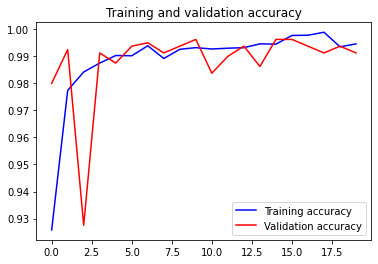

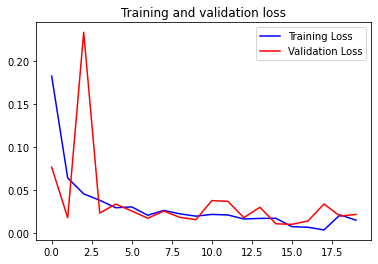

In [ ]:
acc_loss_graph(history_cnn)

## Save model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(filepath="/content/gdrive/MyDrive/EXAMPLE/FACE_MASK/result/my_model_checkpoint.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
history_cnn = model_cnn.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=5,
                    callbacks=[checkpoint_callback],
                    verbose=1)

Epoch 1/5
313/313 [==============================] - 23s 74ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.0044 - val_accuracy: 0.9975

Epoch 00001: val_loss improved from inf to 0.00445, saving model to /content/gdrive/MyDrive/EXAMPLE/FACE_MASK/result/my_model_checkpoint.h5
Epoch 2/5
313/313 [==============================] - 23s 75ms/step - loss: 7.1550e-04 - accuracy: 0.9998 - val_loss: 0.0079 - val_accuracy: 0.9950

Epoch 00002: val_loss did not improve from 0.00445
Epoch 3/5
313/313 [==============================] - 23s 74ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0524 - val_accuracy: 0.9912

Epoch 00003: val_loss did not improve from 0.00445
Epoch 4/5
313/313 [==============================] - 23s 74ms/step - loss: 0.0170 - accuracy: 0.9948 - val_loss: 0.0175 - val_accuracy: 0.9912

Epoch 00004: val_loss did not improve from 0.00445
Epoch 5/5
313/313 [==============================] - 23s 75ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0120 - val_a

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model = tf.keras.models.load_model('/content/gdrive/MyDrive/EXAMPLE/FACE_MASK/result/my_model_checkpoint.h5')

# Show the model architecture
restored_model.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Re-evaluate the model
loss, acc = restored_model.evaluate(validation_generator)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

## Finetune

### EarlyStopping

In [ ]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=.05, 
    patience=10,
    verbose=1)

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="my_model_checkpoint.h5",
                                                 save_weights_only=False, # the whole model (False) or only weights (True) 
                                                 save_best_only=True, # keep the best model with lowest validation loss
                                                 monitor='val_loss',
                                                 verbose=1)

In [ ]:
model_cnn = cnn_maker()

history_cnn = model_cnn.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    callbacks=[checkpoint_callback, earlystopping_callback], 
                    verbose=1)

Epoch 1/100
313/313 [==============================] - 24s 75ms/step - loss: 0.1811 - accuracy: 0.9331 - val_loss: 0.1155 - val_accuracy: 0.9588

Epoch 00001: val_loss improved from inf to 0.11554, saving model to my_model_checkpoint.h5
Epoch 2/100
313/313 [==============================] - 24s 75ms/step - loss: 0.0868 - accuracy: 0.9704 - val_loss: 0.0650 - val_accuracy: 0.9812

Epoch 00002: val_loss improved from 0.11554 to 0.06502, saving model to my_model_checkpoint.h5
Epoch 3/100
313/313 [==============================] - 24s 75ms/step - loss: 0.0652 - accuracy: 0.9774 - val_loss: 0.0209 - val_accuracy: 0.9912

Epoch 00003: val_loss improved from 0.06502 to 0.02094, saving model to my_model_checkpoint.h5
Epoch 4/100
313/313 [==============================] - 23s 75ms/step - loss: 0.0395 - accuracy: 0.9860 - val_loss: 0.0360 - val_accuracy: 0.9862

Epoch 00004: val_loss did not improve from 0.02094
Epoch 5/100
313/313 [==============================] - 23s 75ms/step - loss: 0.0428 

## Predict a real image

In [ ]:
# UPLOAD A PHOTO and PREDICT
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print(fn)
  img_path = './' + fn

Saving istockphoto-hand-on-mouth.jpg to istockphoto-hand-on-mouth (2).jpg
istockphoto-hand-on-mouth.jpg


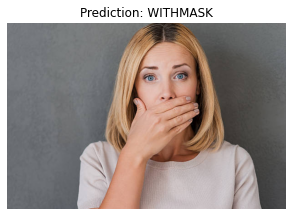

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img        = image.load_img(img_path, target_size=(224, 224))
img_array  = image.img_to_array(img)
img_array  = np.expand_dims(img_array, axis=0)

prediction = restored_model.predict(img_array)

for key, value in validation_generator.class_indices.items():
  if value == prediction[0].argmax():
    pred = key

plt.figure(figsize=(5,5))
img = mpimg.imread(img_path)
plt.imshow(img)
plt.title('Prediction: ' + pred.upper())
plt.axis('off')
plt.grid(b=None)
plt.show()